# Opis danych

Analizowane dane zostały pobrane ze strony kaggle.com **Avocado Prices**. Pochodzą one bezpośrednio z kas sprzedawców detalicznych na podstawie rzeczywistej sprzedażdy awokado odmiany Hass w latach 2015-2018 w Stanach Zjednoczonych.
Kolumny zbioru danych, które będziemy analizować:

- **Date** - data obserwacji
- **AveragePrice** - średnia cena pojedynczego awokado
- **type** - typ awokado (ekologiczny lub konwenjonalny)
- **year** - rok obserwacji
- **Region** - region obserwacji
- **TotalVolume** - całkowita liczba sprzedanych owoców
- **TotalBags** - całkowita liczba sprzedanych toreb
- **SmallBags** - liczba małych toreb
- **LargeBags** - liczba średnich toreb
- **XLargeBags** - liczba dużych toreb

Dane zostały przeniesione z formatu csv do bazy SQLite. Są kompletne i nie potrzebują wstępnego oczyszczania.
Do analizy zostało użyte środowisko **jupyter** i biblioteki: **sqlite3, matplotlib, pandas, seaborn,**

## Wczytywanie danych

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import pylab as pl
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

Zmiennej **avocado_data** przypisane zostały dane, które będziemy analizować.

In [2]:
avocado_data = None
with sqlite3.connect('my_data.db') as conn:
    avocado_data = pd.read_sql('select * from avocado', conn)
avocado_data.head()

,lp,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Powyżej można zobaczyć w jaki sposób są reprezentowane dane w tabelach. Znajdują się tam również dane dotyczące rozmiarów sprzedawanych owoców - tabele **4046, 4225, 4770**. 

# Analiza danych

Można zauważyć, że w ostatnich latach zainteresowanie produktami ekologicznymi stale rośnie. Konsumenci przeważnie chętniej kupują produkty, które są oznaczone jako ekologiczne. Różnią się tym od konwencjonalych, że przy ich przetwarzniu i produkcji nie używa się chemikaliów, więc są zdrowszą opcją, jednakże ich ceny są przeważnie zdecydowanie wyższe. 
Na początku sprawdzimy jaki typ awokado miał większe zainteresowanie wśród kupujących. 


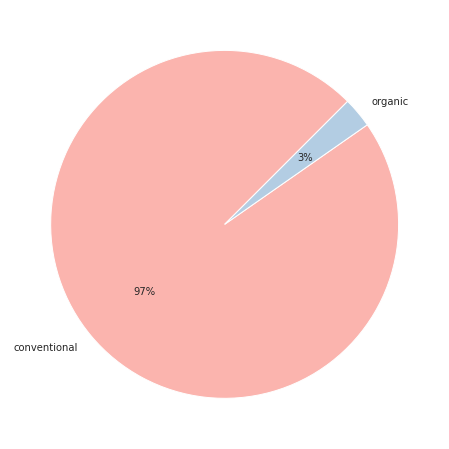

In [64]:
Type=avocado_data.groupby('type')['TotalVolume'].agg('sum')
labels = 'conventional','organic'
sizes = [Type['conventional'],Type['organic']]
fig, ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('Pastel1')
plt.pie(sizes, labels = labels, colors = colors, autopct='%.0f%%',startangle=45)
plt.show()

Widzimy, że tylko 3% zbioru jest oznaczone jako awokado ekologiczne. 
Sprawdźmy teraz średnią cene i łączną sprzedaną ilość w zależności od typu.

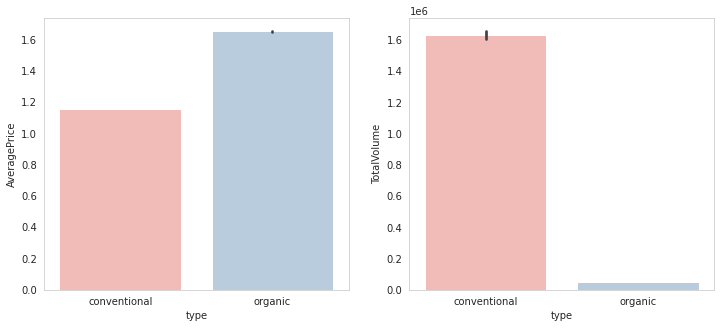

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x='type', y='AveragePrice', data=avocado_data, palette='Pastel1', ax=ax[0])
sns.barplot(x='type', y='TotalVolume', data=avocado_data, palette='Pastel1', ax=ax[1])
plt.show()

Zauważamy, że średnia cena awokado jest dużo wyższa dla typu ekologicznego - co jest faktem oczywistym, ponieważ koszty jego uprawy są większe. Patrząc na wykres, który przedstawia całkowitą liczbę sprzedanych owoców widzimy, że ilość sprzedanego ekologicznego awokado jest o wiele mniejsza od tego konwencjonalnego. Jedną z przyczyn tego zajwiska, może być właśnie fakt dotyczący różnic w cenach tych produktów. Ale czy to jest jedyny powód dla którego, ekologiczne awokado zostaje rzadziej wybierane przez konsumentów?

Spójrzmy na rozkład średnich cen owoców, medianę oraz średnią.

/home/martyna/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


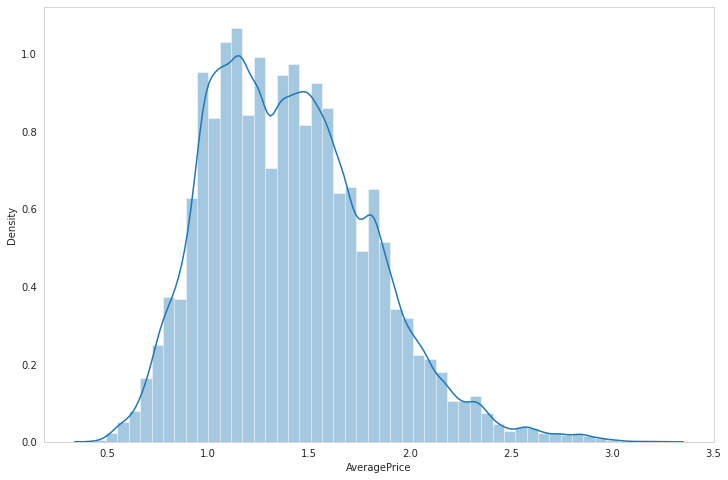

Średnia: 1.4  Mediana:  1.37


In [12]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.distplot(avocado_data["AveragePrice"])
plt.show()
mean=avocado_data["AveragePrice"].mean()
median=avocado_data["AveragePrice"].median()
print('Średnia:', round(mean,2), ' Mediana: ', median )

Przyjrzyjmy się teraz jak region wpływa na cenę awokado. Najpierw sprawdźmy awokado ekologiczne.

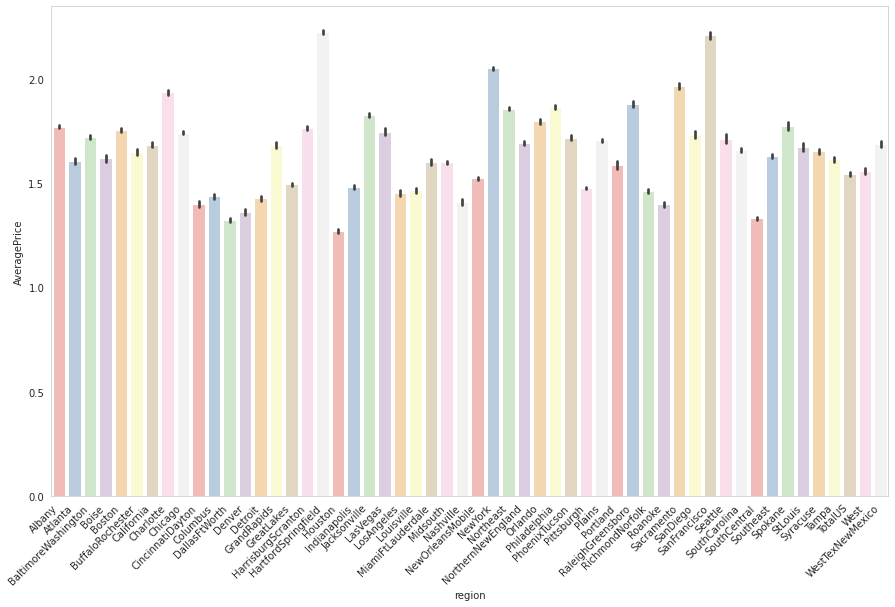

In [55]:
fig, ax = plt.subplots( figsize=(15,10))
mask = avocado_data['type']=='organic'
ax = sns.barplot(x="region", y="AveragePrice", data=avocado_data[mask], palette='Pastel1')
fig.autofmt_xdate(rotation=45)

Zauważamy, że wyższa cena awokado znjaduje się w większych miastach takich jak San Francisco lub New York. W mniejszych miastach te ceny są dużo niższe. Może to wynikać z dochodów konsumentów, które są wyższe w większych miastach, a co za tym idzie mogą wydać więcej na ekologiczne jedzenie. Dla porównania spójrzmy na średnie ceny nieekologicznego awokado.

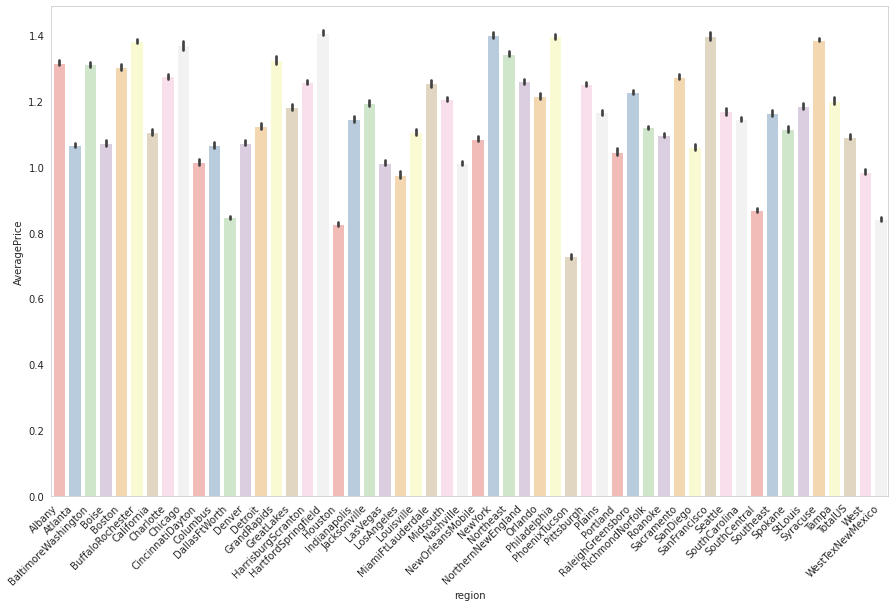

In [13]:
fig, ax = plt.subplots( figsize=(15,10))
mask = avocado_data['type']=='conventional'
ax = sns.barplot(x="region", y="AveragePrice", data=avocado_data[mask], palette='Pastel1')
fig.autofmt_xdate(rotation=45)

Jak widać średnie ceny są niższe. W San Francisco i New Yorku jednak ceny znowu są jedne z najwyższych podobnie jak poprzednio. Może to wynikać z takich samych przyczyn.

Porównajmy jeszcze średnie ceny dla tych dwóch typów na przestrzeni 2015-2018 roku

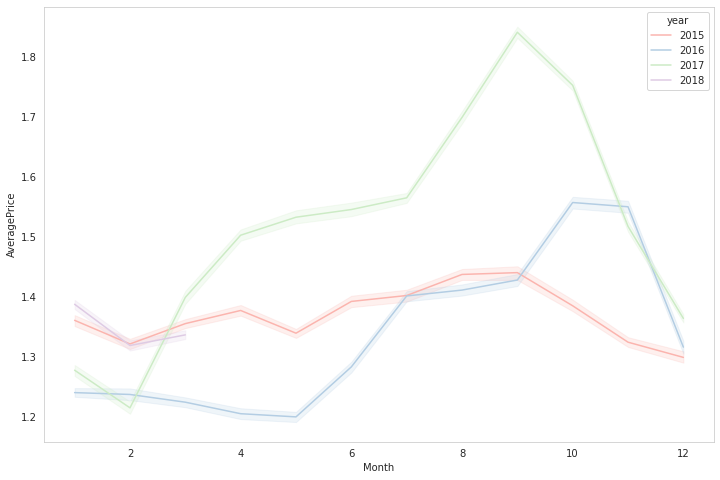

In [14]:
fig = plt.subplots( figsize=(12,8))
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])
avocado_data['Month'] = avocado_data['Date'].dt.month
sns.lineplot(x="Month", y="AveragePrice", hue='year', data=avocado_data, palette='Pastel1')
plt.show()

Zauważmy, że w I i IV kwartale ceny są dużo niższe niż w II i III, mogło to być spowodowane tym, że w tych miesiącach ogólna dostępność awokado była mniejsza. W 2015 ceny przez cały rok były na podobnym poziomie w przeciwieństwie do 2017 roku gdzie 
rynek awokado doświadczył najwiekszej zmienności. Najbardziej znaczący trend wzrostowy występuje między czerwcem, a październikiem. Możemy zobaczyć, jak zachowują się ceny każdego roku w ciągu wszystkich dwunastu miesięcy. Pomoże nam to sprawdzić, czy istnieją jakieś główne wzorce sezonowe oraz czy w każdym miesiącu występujeą jakieś główne trendy. 

Jeszcze możemy się zastanowić jakie wielkości paczek owoców wybierali chętniej konsumenci w zależności od roku.

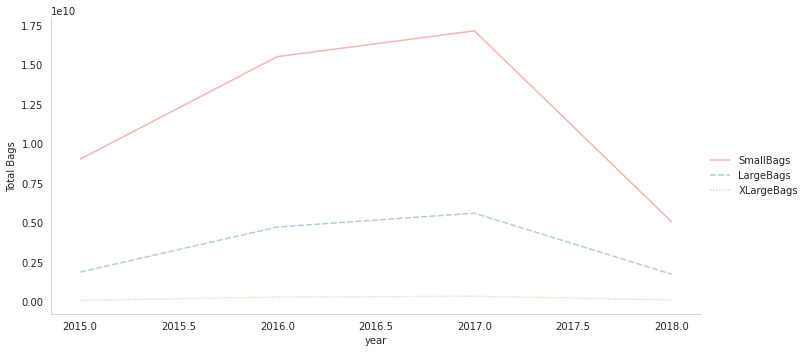

In [61]:
Bags = avocado_data[['SmallBags', 'LargeBags','XLargeBags']].groupby(avocado_data.year).sum()
sns.relplot(data = Bags,kind='line', palette = "Pastel1",aspect=2)
plt.ylabel("Total Bags")
plt.show()

Jak widać najczęściej są kupowane małe paczki owoców. W roku 2017 można zaobserować spadek sprzedaży małych i średnich paczek, może to być spowodowane tym, że w tamtym roku średnie ceny awokado były wyższe niż w innych latach - fakt ten zauważyliśmy po analizie poprzedniego wykresu. Na poniższym wykresie możemy zauważyć, że rzeczywiscie całkowita sprzedaż w 2017 roku zaczęła maleć w szybkim tempie, gdzie w poprzednich latach była na wyrówanym poziomie.

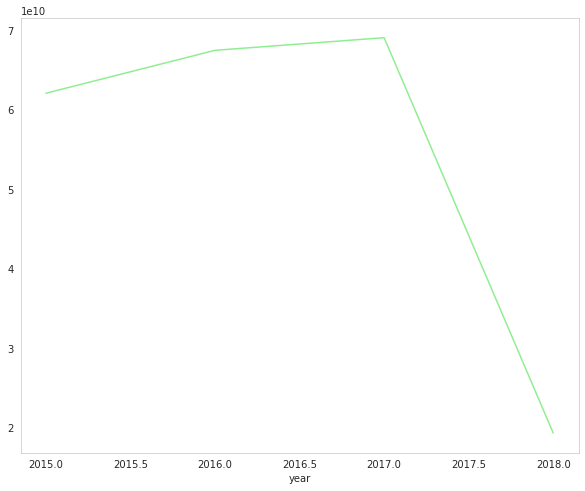

In [72]:
fig = plt.subplots( figsize=(10,8))
Month = avocado_data['TotalVolume'].groupby(avocado_data.year).sum()
Month.plot(kind="line", color ='lightgreen')
plt.show()

# Analiza korelacji

Zajmijmy się analizą zależności pomiędzy danymi za pomocą współczynnika korealcji.

Współczynnik korelacji ma wartości od -1 do 1, gdzie -1 wskazuje na zupełną korelacje ujemną, 0 oznacza brak korelacji, a 1 zupełną korelacje dodatnią.

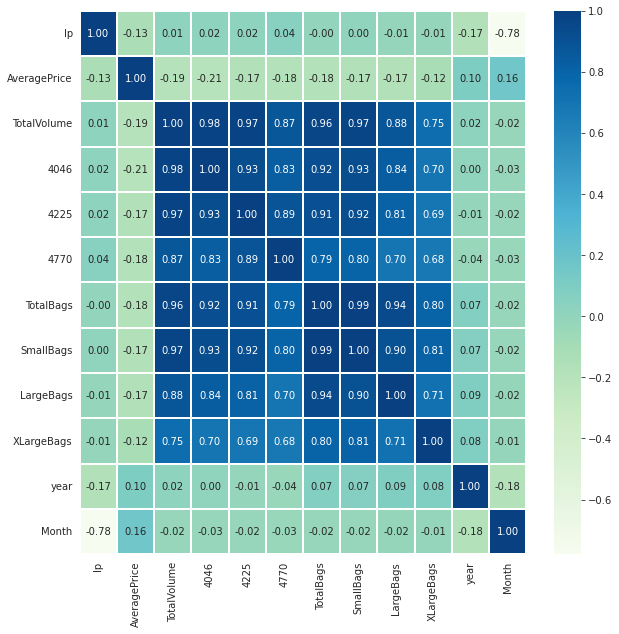

In [17]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(avocado_data.corr(),cmap='GnBu', annot=True, linewidths=.4, fmt= '.2f')
plt.show()

Jeśli kolory stają się ciemniejsze to znaczy, że korelacja staje się siliejsza. Od razu można zauważyć, że średnia cena nie ma nic wspólnego z rozmiarami toreb ani rodzajem awokado. Także rok nie wypływa na pozostałe wartości danych. Można dostrzec wysoką korelacje ilości toreb z całkowitą ilością sprzedanych owoców i ilością małych toreb, więc można powiedzieć, że zdecydowana większość sprzedaży pochodzi z małych toreb. Widać także wysoką zależność miedzy rozmiarami awokado, a całkowitą sprzedaną ich ilością.

Możemy się przyjrzeć bliżej relacji pomiędzy wielkością toreb, a całkowitą ilością sprzedanych owoców obrazując je za pomocą wykresów punktowych.

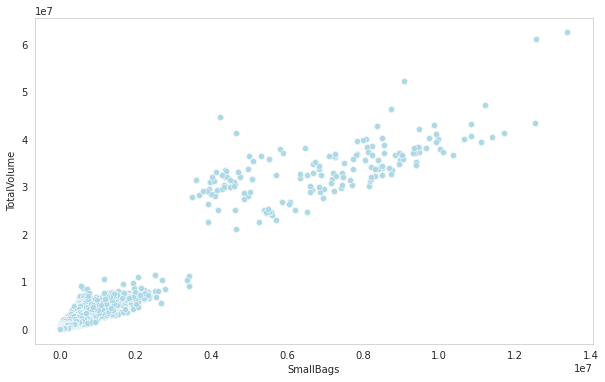

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=avocado_data, x = 'SmallBags', y = 'TotalVolume', color='lightblue')
plt.show()

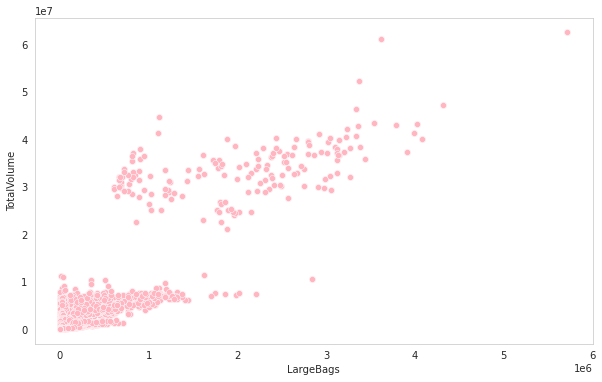

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=avocado_data, x = 'LargeBags', y = 'TotalVolume', color= 'lightpink')
plt.show()

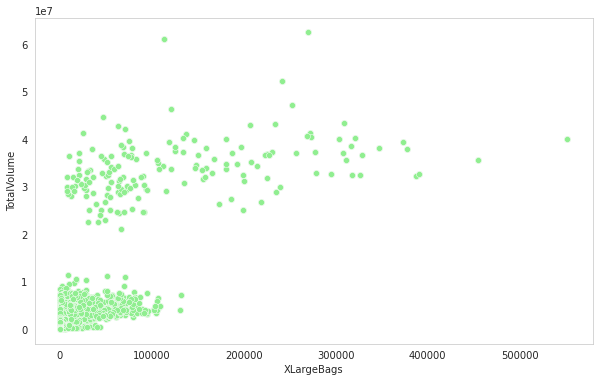

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=avocado_data, x = 'XLargeBags', y = 'TotalVolume', color= 'lightgreen')
plt.show()

# Podsumowanie analizy

Zgodnie z oczekiwaniami zauważyliśmy, że ekologiczne awokado jest znacznie droższe niż konwencjonalne awokado.
Istnieją pewne rozróżnialne wzory między tymi dwoma rodzajami awokado, jednak widzimy, że większość jest podobna.
Rok 2017 był najlepszym rokiem dla sprzedawców awokado. Był rokiem o najwyższych cenach, ale także o największej ich zmienności. Oznacza to, że wahania cen były wyższe niż w poprzednich dwóch latach.
Zauważyliśmy stały trend wzrostu cen awokado, gdy nadchodzi III kwartał. Dotyczy to zarówno konwencjonalnych, jak i ekologicznych awokado.